# <center>Logistic Map时间序列的预测 






姓名：林宇宸

学号：19720182203933

邮箱：19720182203933@stu.xmu.edu.cn

# 摘要

机器学习的另一个重要应用是对时间序列建模，它从历史数据提取规律，来预测未来。微分方程或者迭代方程都用来描述时间序列。在现实生活中，股票价格、心电图以及感染 COVID-19 的人数等都可以看做时间序列。本文将使用常规三层神经网络与随机三层神经网络对Logistic Map的时间序列进行预测，同时探索不同r值（即不同的李雅普诺夫指数）下对预测能力的影响。

# 背景介绍

## Logistic Map

逻辑斯蒂映射（LogisticMap）是一种抛物线单峰映射，它展现了一个简单的非线性方程能够产生何种复杂、混沌的行为。该映射最早由生物学家 Robert May 在其1976年的论文中提出 [1]。该方程最早用于研究生物个体数随时间的演化问题，方程形如

$$x_{n+1}=r x_{n}(1-x_{n}) ，  x \in [0,1], r \in [0,4]$$

其中$x_{n}$为第 n 代生物个体数占环境所能容纳大最大个体数的比值，$x_{n+1}$为第 n+1 代生物个体数占环境所能容纳大最大个体数的比值。该方程右侧$x_{n}$项体现了生物数量对繁殖的有利影响，而$1-x_{n}$则体现了因生物数量接近最大容量从而产生的生存压力。该方程描述了在上述两种因素下生物种群的演化情况。[1]

## 时间序列

时间序列是按照时间排序的一组随机变量，它通常是在相等间隔的时间段内依照给定的采样率对某种潜在过程进行观测的结果。时间序列数据本质上反映的是某个或者某些随机变量随时间不断变化的趋势，而时间序列预测方法的核心就是从数据中挖掘出这种规律，并利用其对将来的数据做出估计。[2]

时间序列的作用：
1. 可以反映社会经济现象的发展变化过程，描述现象的发展状态和结果。


2. 可以研究社会经济现象的发展趋势和发展速度。


3. 可以探索现象发展变化的规律，对某些社会经济现象进行预测。


4. 利用时间序列可以在不同地区或国家之间进行对比分析，这也是统计分析的重要方法之一。

## 李雅普诺夫指数

李雅普诺夫指数刻画系统相空间任意一条微扰的轨道以何种方式偏离原轨道。我们任意选择两条靠得很近的轨道，它们的初始状态分别为：$x_{0}$ 和 $x_{0}+ \delta x_{0}$，迭代 $n$ 次后，系统状态分别为 $x_{n}$ 和 $x_{n} + \delta x_{n}$。定义李雅普诺夫指数 $\lambda $，满足如下等式：[3]

$$|\delta x_{0}|e^{\lambda n } :=\left|\delta x_{n}\right|$$，

两边去自然对数得：

$$\lambda = \frac{1}{n}\ln \left|\frac{\delta x_{n}}{\delta x_{0}}\right|$$

**另一种更稳定的算法**
$$ \lambda = \frac{1}{n}\ln \left|\frac{\delta x_{n}}{\delta x_{0}}\right|$$


$$ =  \frac{1}{n}\ln \left|\frac{f^n(x_{0}+\delta x_{0})-f^n(x_{0})}{\delta x_{0}}\right|$$

$$ =  \frac{1}{n}\ln \left|(f^n)^{'}(x_{0})) \right|$$

$$ =  \frac{1}{n}\ln \left|\prod_{i=0}^{n-1} f^{'}(x_i) \right| $$

$$ =  \frac{1}{n}\sum_{i=0}^{n-1} \ln \left|f^{'}(x_i) \right| $$

## 人工神经网络

人工神经网络（Artificial Neural Network，即ANN），是20世纪80 年代以来人工智能领域兴起的研究热点。它从信息处理角度对人脑神经元网络进行抽象， 建立某种简单模型，按不同的连接方式组成不同的网络。在工程与学术界也常直接简称为神经网络或类神经网络。神经网络是一种运算模型，由大量的节点（或称神经元）之间相互联接构成。每个节点代表一种特定的输出函数，称为激励函数（activation function）。每两个节点间的连接都代表一个对于通过该连接信号的加权值，称之为权重，这相当于人工神经网络的记忆。网络的输出则依网络的连接方式，权重值和激励函数的不同而不同。而网络自身通常都是对自然界某种算法或者函数的逼近，也可能是对一种逻辑策略的表达。[4]

# Logistic Map

## Logistic Map虫口图与李雅普诺夫指数

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


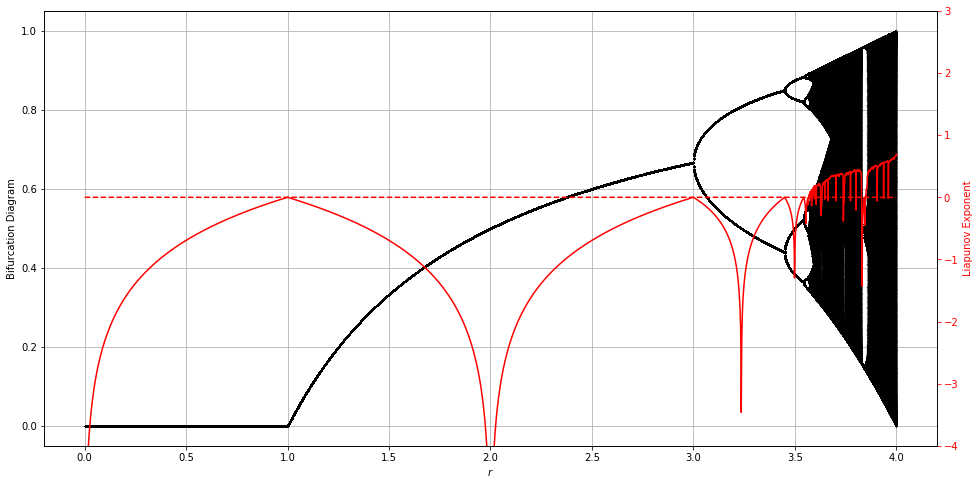

In [1]:
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline

def LogisticMapFunction(x,r): # 定义 logistic map
    return r*x*(1-x)

def LogisticMapDynamics(x,r,n): # x0,x1,x2,...,xn
    X = []
    Y = []
    for i in np.arange(0,n):
        X.append(i)
        Y.append(x)
        x = LogisticMapFunction(x,r)
    return np.array(X),np.array(Y)

N = 30000
r = np.linspace(0,4,5000)

x1 = np.random.rand(len(r))
dx = np.zeros(len(r))

for i in np.arange(0,5000): # 去暂态
    x1 = LogisticMapFunction(x1,r)


for i in np.arange(0,N):
    dx = dx + np.log(np.abs(r-2*r*x1))
    x1 = LogisticMapFunction(x1,r)
    
L = dx/N # 李指数


x = np.random.rand(len(r))

for i in np.arange(5000):  # 去暂态
    x = r*x*(1-x)

fig = plt.figure(figsize=(16, 8))
plt.grid(True)
ax1 = fig.add_subplot(111)
for i in np.arange(5000):
    x = r*x*(1-x)
    ax1.plot(r,x,'k.',markersize = 1,alpha = 0.1)
ax1.set_ylabel("Bifurcation Diagram")
ax1.set_xlabel("$r$")
    
#fig.axis([3.568,3.575,0.34,0.36])
#plt.xlabel("$r$")
#plt.ylabel("$X$")
#plt.title("bifurcation plot")

Zero = np.zeros(len(r))
ax2 = ax1.twinx()
ax2.plot(r,L,'r-')
p1, = ax2.plot(r,Zero,'r--')
ax2.set_ylim(-4,3)
ax2.set_ylabel("Liapunov Exponent")
ax2.yaxis.label.set_color(p1.get_color())
ax2.tick_params(axis='y',colors=p1.get_color())



## Logistic Map函数图像

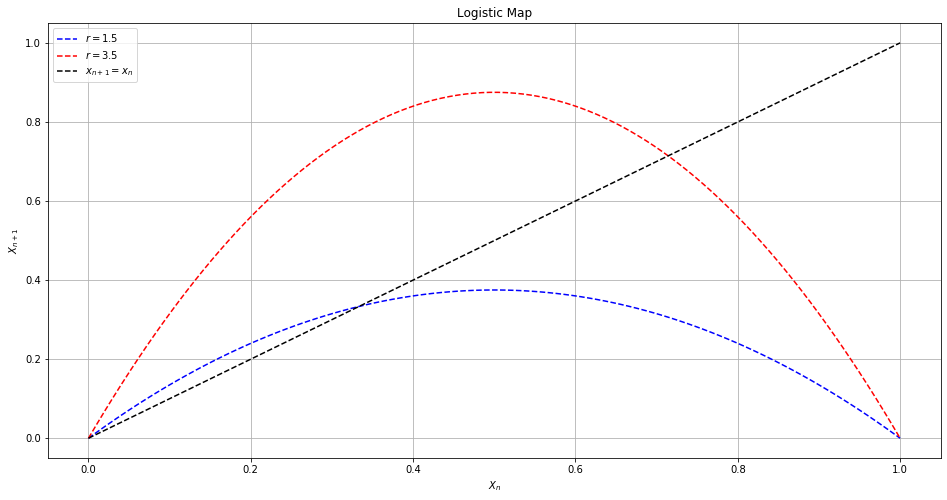

In [2]:
X = np.linspace(0,1,100)
Y1 = LogisticMapFunction(X,1.5)
Y2 = LogisticMapFunction(X,3.5)
Y3 = X


plt.figure(figsize=(16, 8))
plt.plot(X,Y1,'b--',label="$r=1.5$")
plt.plot(X,Y2,'r--',label="$r=3.5$")
plt.plot(X,Y3,'k--',label="$x_{n+1}=x_{n}$")
plt.xlabel("$X_{n}$")
plt.ylabel("$X_{n+1}$")
plt.title("Logistic Map")
plt.legend(loc=0)
plt.grid(True)

## Logistic Map的时间序列

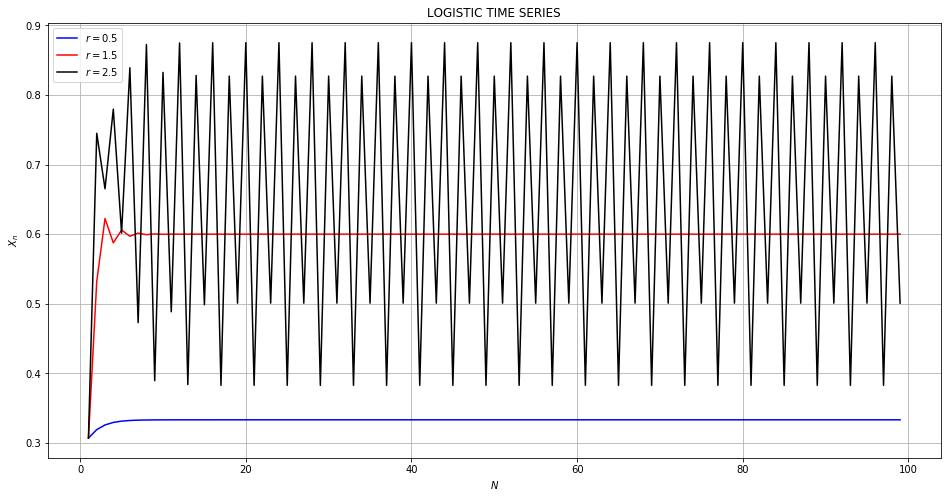

In [3]:
def LogisticMapFunction(x,r):
    return r*x*(1-x)
def Logisticmapdynamics(x,r,n):
    X=[]
    Y=[]
    for i in range(1,n):
        X.append(i)
        Y.append(x)
        x=LogisticMapFunction(x,r)
    return np.array(X),np.array(Y)
x=np.random.rand(1)
X1,Y1=Logisticmapdynamics(x,1.5,100)
X2,Y2=Logisticmapdynamics(x,2.5,100)
X3,Y3=Logisticmapdynamics(x,3.5,100)
plt.figure(figsize=(16, 8))
plt.plot(X1,Y1,'b',label="$r=0.5$")
plt.plot(X2,Y2,'r',label="$r=1.5$")
plt.plot(X3,Y3,'k',label="$r=2.5$")
plt.xlabel("$N$")
plt.ylabel("$X_{n}$")
plt.title("LOGISTIC TIME SERIES")
plt.legend(loc=0)
plt.grid(True)

# 用三层网络训练并预测时间序列

## 定义网络函数

在这里我们首先根据定义写出常规三层网络和随机三层网络的代码。

### 常规三层网络

In [4]:
%%time
#定义sigmod函数
def sigmod(x):
    return 1/(1+np.exp(-x))


#ANN(input_object,target,n_iter,alpha,hidden_layer_dimension)
#ANN(坐标变量、y值，训练次数，学习率，隐藏层宽度)
def ANN(input_object,target,n_iter,alpha,hidden_layer_dimension):
    hidden_layer_num=1
    n_iter=n_iter
    alpha=alpha
    m=input_object.shape[0]
    input_dimension=input_object.shape[1]
    hidden_layer_1_dimension=hidden_layer_dimension
    output_dimension=1
    X=input_object
    y=target.reshape(-1,1)
    Omega1=np.random.randn(input_dimension+1,hidden_layer_1_dimension)
    Omega2=np.random.randn(hidden_layer_1_dimension+1,output_dimension)
    J_ann=np.empty(n_iter)
    Jx_ann=np.empty(n_iter)
    #开始训练
    for i in np.arange(n_iter):
        #定义矩阵
        a1=X
        a11=np.insert(a1,0,values=1,axis=1)
        Z2=np.dot(a11,Omega1)
        a2=sigmod(Z2)
        a21=np.insert(a2,0,values=1,axis=1)
        Z3=np.dot(a21,Omega2)
        a3=Z3
        a_out_ann=a3
        #获得特征函数
        a_feature_ann=a2
        #计算cost function
        J_ann[i]=np.dot((a3-y).T,(a3-y))/2/m
        Jx_ann[i]=i
        #反向传播 Backpropagation
        delta3=a3-y
        d_Omega2=np.dot(a21.T,delta3)
        delta2=np.dot(delta3,Omega2[1:,:].T)*(a2*(1-a2))
        d_Omega1=np.dot(a11.T,delta2)
        #update weights
        Omega1=Omega1-alpha*d_Omega1/m
        Omega2=Omega2-alpha*d_Omega2/m
    return Jx_ann,J_ann,a_out_ann,Omega1,Omega2
            
def TANN(X,Omega1,Omega2):
    a1=X
    a11=np.insert(a1,0,values=1,axis=1)
    Z2=np.dot(a11,Omega1)
    a2=sigmod(Z2)
    a21=np.insert(a2,0,values=1,axis=1)
    Z3=np.dot(a21,Omega2)
    a3=Z3
    a_out_ann=a3
    return a_out_ann
def ANNTS(x0,steps,omega1,omega2):
    x=np.zeros((1,1))
    x[0]=x0
    N=np.zeros((steps,1))
    XOUT=np.zeros((steps,1))
    for i in range(0,steps):
        N[i]=i
        XOUT[i]=x[0]
        x[0]=TANN(x,omega1,omega2)
    return N,XOUT
    

Wall time: 0 ns


### 随机三层网络

In [5]:
%%time
#定义sigmod函数
def sigmod(x):
    return 1/(1+np.exp(-x))

#定义三层网络的特征函数
def fn_ran(X,Omega1_ran_1):
    a1=X
    a11=np.insert(a1,0,values=1,axis=1)
    Z2=np.dot(a11,Omega1_ran_1)
    a2=sigmod(Z2)
    return a2
#RANN(input_object,target)
#RANN(坐标变量、y值，训练次数)
def RANN(input_object,target,hidden_layer_dimension):
    X=input_object
    y=target
    #三层网络
    width=hidden_layer_dimension
    Omega_width=2

    input_dimension=1
    hidden_layer_1_diemension=width
    output_dimension=1

    np.random.seed(40) # 固定初始权重，使每次学习结果都一样

    # 初始化权重
    Omega1_ran=np.random.randn(input_dimension+1,hidden_layer_1_diemension)*Omega_width

    #用Normal Equation进行训练
    a2=fn_ran(X,Omega1_ran)

    a21=np.insert(a2,0,values=1,axis=1)

    A=a21
    C=np.dot(A.T,A)
    B=np.linalg.pinv(C)
    D=np.dot(B,A.T)
    OMega2_Norm=np.dot(D,y)

    #训练结果
    a3_Norm=np.dot(a21,OMega2_Norm)
    m=100
    #训练误差
    RMSE=np.sqrt(np.dot((a3_Norm-y).T,(a3_Norm-y))/m).item()
    
    return a3_Norm,RMSE,a2,Omega1_ran,OMega2_Norm

def TRANN(X,Omega1,Omega2):
    a2=fn_ran(X,Omega1)
    a21=np.insert(a2,0,values=1,axis=1)
    a3_Norm=np.dot(a21,Omega2)
    return a3_Norm

def RANNTS(x0,steps,omega1,omega2):
    x=np.zeros((1,1))
    x[0]=x0
    N=np.zeros((steps,1))
    XOUT=np.zeros((steps,1))
    for i in range(0,steps):
        N[i]=i
        XOUT[i]=x[0]
        x[0]=TRANN(x,omega1,omega2)
    return N,XOUT

Wall time: 0 ns


## 用常规三层网络进行训练并预测

在这里我们采用r=3.5时的Logistic Map进行训练，原因在于此时系统处于有序状态，即李雅普诺夫指数是<0的，且这个r值距离无序状态的r值也较接近，猜想运用3.5的r值进行训练可以得到较好的推广能力。

同时初值采用x的中间值0.5.

### 生成训练集

首先我们采用迭代后的50个点作为训练集来训练神经网络。

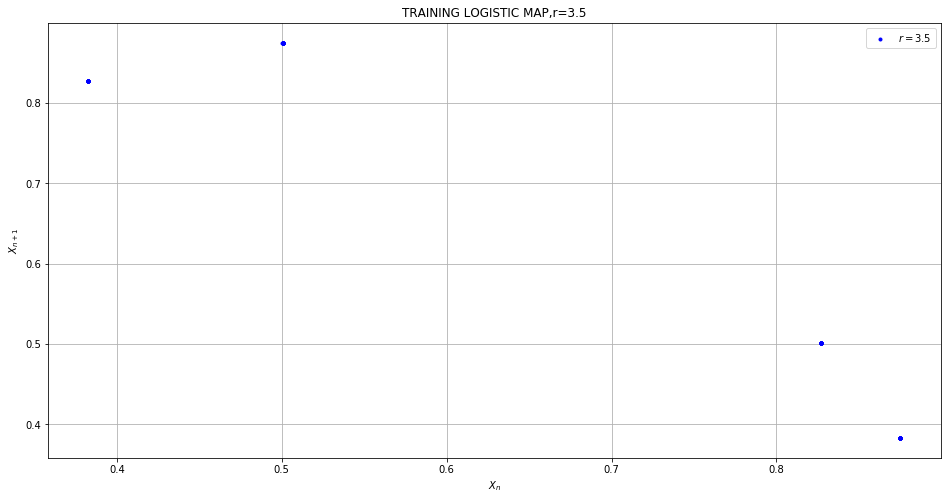

In [6]:
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline

def logi(x,r): # 定义 logistic map
    return r*x*(1-x)

def logitime(x,r,m): # 生成 logistic map 训练集
    X=np.zeros(m)
    Y=np.zeros(m)
    for i in np.arange(0,m):
        X[i]=x
        x=logi(x,r)
        Y[i]=x
    return X,Y

def logipart(X,Omega1,Omega2):
    a1=X
    a11=np.insert(a1,0,values=1,axis=1)
    Z2=np.dot(a11,Omega1)
    a2=sigmod(Z2)
    a21=np.insert(a2,0,values=1,axis=1)
    Z3=np.dot(a21,Omega2)
    a3=Z3
    a_out_ann=a3
    return a_out_ann

def LogisticMapFunction(x,r):
    return r*x*(1-x)

def Logisticmapdynamics(x,r,n):
    X=[]
    Y=[]
    for i in range(0,n):
        X.append(i)
        Y.append(x)
        x=LogisticMapFunction(x,r)
    return np.array(X),np.array(Y)


xt0,r0,m0=0.5,3.5,50
XTR0,YTR0=logitime(xt0,r0,m0)
XTR0=XTR0.reshape(-1,1)
YTR0=YTR0.reshape(-1,1)
plt.figure(figsize=(16, 8))
plt.title("TRAINING LOGISTIC MAP,r=3.5")
plt.xlabel("$X_{n}$")
plt.ylabel("$X_{n+1}$")
plt.plot(XTR0,YTR0,'b.',label="$r=3.5$")
plt.legend(loc=0)
plt.grid(True)

### 进行训练

在训练中，我们令迭代次数为100000次，取学习率为0.11，网络的宽度取10.

In [7]:
#ANN(input_object,target,n_iter,alpha,hidden_layer_dimension)
#ANN(坐标变量、y值，训练次数，学习率，隐藏层宽度)
Jx_1,J_1,a_out_1,Omega1_1,Omega2_1=ANN(XTR0,YTR0,100000,0.11,10)

#### 输出训练结果

下面展示的是采用常规三层网络训练得到的结果，当训练到100000此时，模型的lost function值达到了0.001左右，在下图中可以体现。

下面是lost function随迭代次数的变化，我们对精度取了对数，因此可以更直观的展示变化过程。

可以看到，该网络较好的拟合了这个数据集。

The Last Cost Function is 0.0010482395586862833
Wall time: 25.9 ms


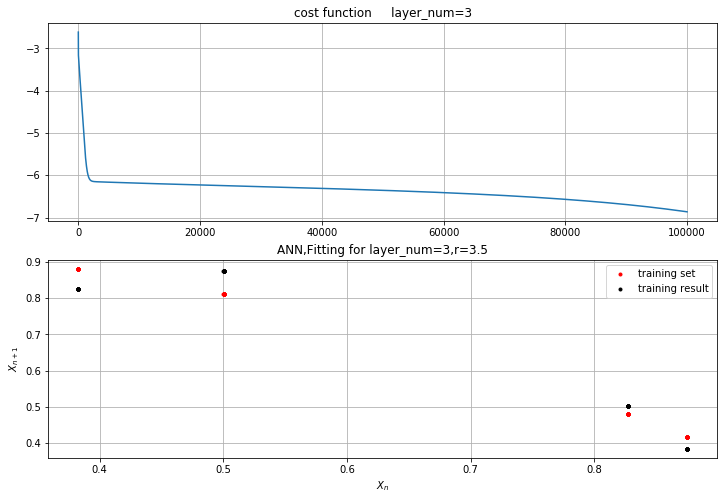

In [89]:
%%time
plt.figure(figsize=(12,8))
print('The Last Cost Function is',J_1[-1])
plt.subplot(211)
plt.plot(Jx_1,np.log(J_1))
plt.title("cost function"+"     "+"layer_num=3")
plt.grid(True)

plt.subplot(212)
plt.title("ANN,Fitting for layer_num=3,r=3.5")
plt.xlabel("$X_{n}$")
plt.ylabel("$X_{n+1}$")
plt.plot(XTR0,a_out_1,'r.',label="training set")
plt.plot(XTR0,YTR0,'k.',label="training result")
plt.legend(loc=0)
plt.grid(True)


### 进行预测

预测过程采用100个样本点。预测过程分三步，先用与模型一样的初值进行预测，第二步略微改变初值，第三步则较大改变初值。从初值的变化中，我们可以看到模型的初值敏感度。

#### 初值相同

In [9]:
xa1_1=0.5
steps=100
omega1_1=Omega1_1
omega2_1=Omega2_1
N1_1,XOUT1_1=ANNTS(xa1_1,steps,omega1_1,omega2_1)

##### 预测结果

当模型与原函数的初值相同时，可以看到模型较好的拟合了时间序列，但是在拐点处的值有所偏差。

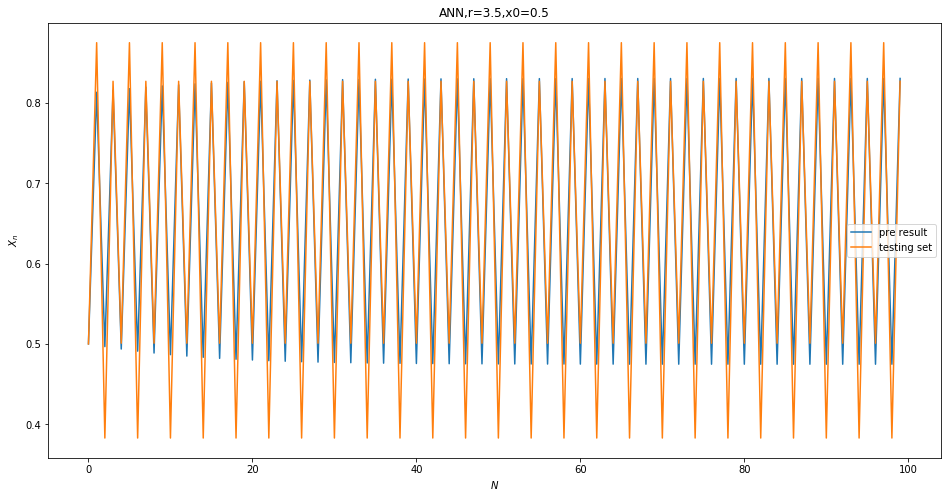

In [71]:
AX1,AY1=Logisticmapdynamics(0.5,3.5,100)

plt.figure(figsize=(16,8))
plt.xlabel("$N$")
plt.ylabel("$X_{n}$")
plt.title("ANN,r=3.5,x0=0.5")
plt.plot(N1_1,XOUT1_1,label="pre result")
plt.plot(AX1,AY1,label="testing set")
plt.legend(loc=0)

#### 初值不同(偏差较小)

In [11]:
xa1_2=0.6
steps=100
omega1_1=Omega1_1
omega2_1=Omega2_1
N1_2,XOUT1_2=ANNTS(xa1_2,steps,omega1_1,omega2_1)

##### 预测结果

我们令初值的该变量为0.1，使模型的初值为0.6.此时我们通过下图可以看到，在迭代开始时，模型与原函数略有偏差，但随着迭代的进行，模型很快回到原函数的走势上，但在拐点处仍旧是有偏差的。

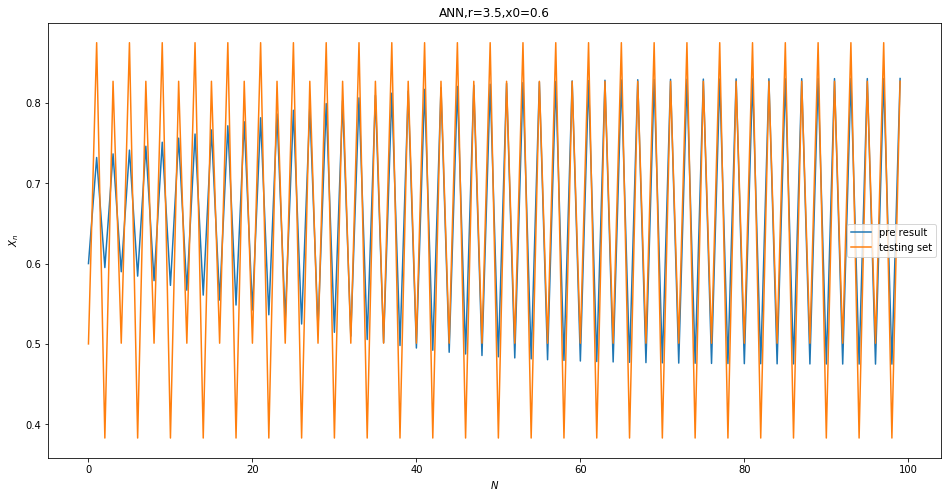

In [72]:
AX1,AY1=Logisticmapdynamics(0.5,3.5,100)

plt.figure(figsize=(16,8))
plt.xlabel("$N$")
plt.ylabel("$X_{n}$")
plt.title("ANN,r=3.5,x0=0.6")
plt.plot(N1_2,XOUT1_2,label="pre result")
plt.plot(AX1,AY1,label="testing set")
plt.legend(loc=0)

#### 初值不同(偏差较大)

In [13]:
xa1_3=0.2
steps=100
omega1_1=Omega1_1
omega2_1=Omega2_1
N1_3,XOUT1_3=ANNTS(xa1_3,steps,omega1_1,omega2_1)

##### 预测结果

我们进一步增大初值的该变量至0.3，使模型的初值为0.2。由下图可以看出，随着初值偏差的增大，在迭代开始时，模型与原函数略有偏差，但随着迭代的进行，模型很快回到原函数的走势上，但在拐点处仍旧是有偏差的。

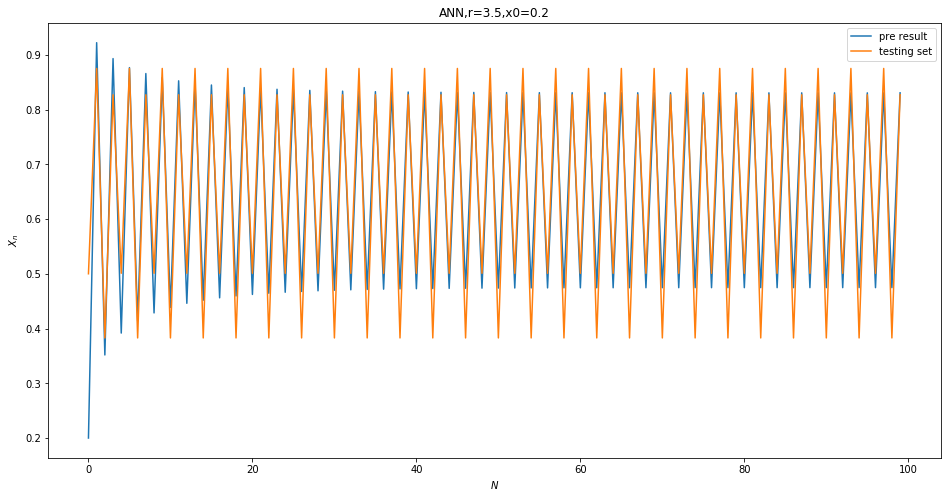

In [73]:
AX1,AY1=Logisticmapdynamics(0.5,3.5,100)

plt.figure(figsize=(16,8))
plt.xlabel("$N$")
plt.ylabel("$X_{n}$")
plt.title("ANN,r=3.5,x0=0.2")
plt.plot(N1_3,XOUT1_3,label="pre result")
plt.plot(AX1,AY1,label="testing set")
plt.legend(loc=0)

## 用随机三层网络进行训练并预测

接下来我们采用随机三层网络对上述数据集进行训练，我们取该随机网络的宽度为1000。

### 进行训练

In [15]:
%%time
ra_out_1,error_1,ra_feature_1,ROmega1_1,ROmega2_1=RANN(XTR0,YTR0,1000)

Wall time: 189 ms


#### 输出训练结果

从训练结果可以看出，随即网络几乎完美的拟合了训练集，其RMSE达到了10的负8次方数量级，可以说精度是非常高的。

TRaining RMSE: 6.694960532791661e-08


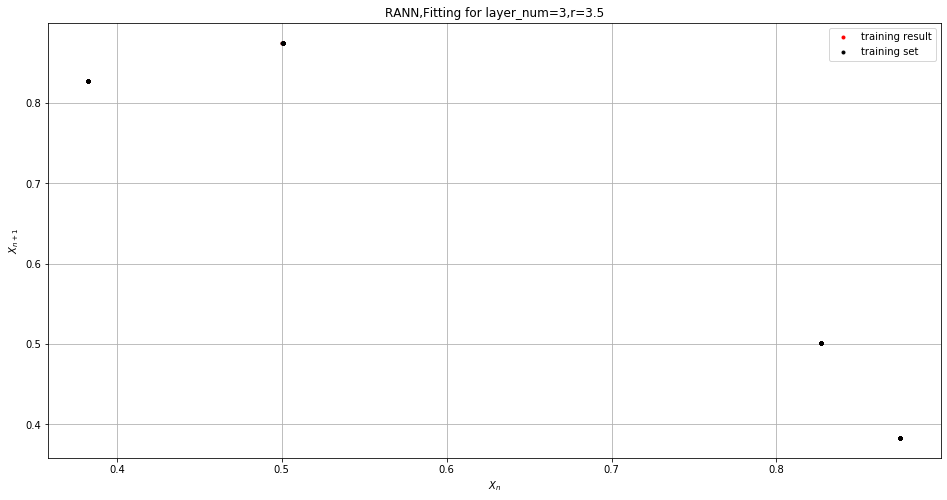

In [90]:
plt.figure(figsize=(16,8))
plt.xlabel("$X_{n}$")
plt.ylabel("$X_{n+1}$")
plt.title("RANN,Fitting for layer_num=3,r=3.5")
print("TRaining RMSE:",error_1)
plt.plot(XTR0,ra_out_1,'r.',label="training result")
plt.plot(XTR0,YTR0,'k.',label="training set")
plt.legend(loc=0)
plt.grid(True)

### 进行预测

#### 初值相同

In [18]:
xr1_1=0.5
steps=100
romega1_1=ROmega1_1
romega2_1=ROmega2_1
RN1_1,RXOUT1_1=RANNTS(xr1_1,steps,romega1_1,romega2_1)

##### 输出预测结果

由下图可见，当初值相同的情况下，模型完美拟合了原函数。

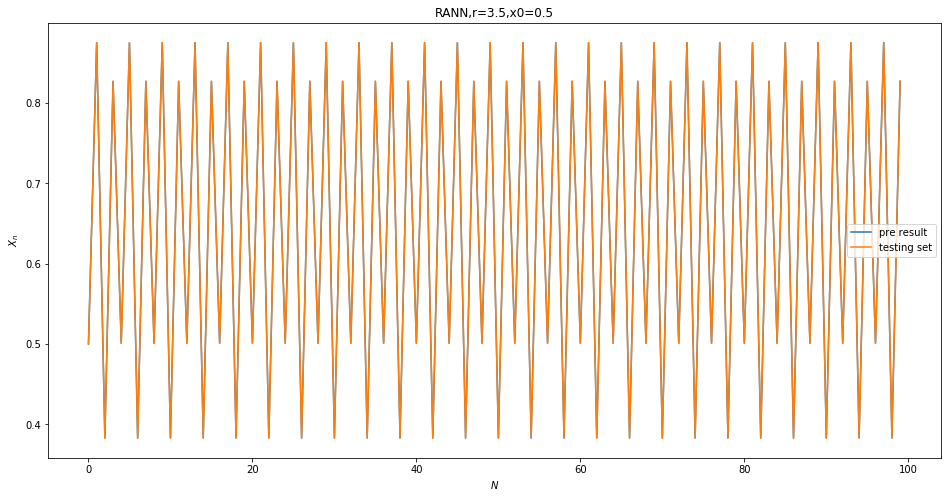

In [74]:
XR1,YR1=Logisticmapdynamics(0.5,3.5,100)

plt.figure(figsize=(16,8))
plt.xlabel("$N$")
plt.ylabel("$X_{n}$")
plt.title("RANN,r=3.5,x0=0.5")
plt.plot(RN1_1,RXOUT1_1,label="pre result")
plt.plot(XR1,YR1,label='testing set')
plt.legend(loc=0)

#### 初值不同(偏差较小)

In [20]:
xr1_2=0.6
steps=100
romega1_1=ROmega1_1
romega2_1=ROmega2_1
RN1_2,RXOUT1_2=RANNTS(xr1_2,steps,romega1_1,romega2_1)

##### 输出预测结果

当我们的初值该变量为0.1，使初值为0.6时，可见模型很快追上了原函数的轨迹，但是在拐点处的值有偏差。

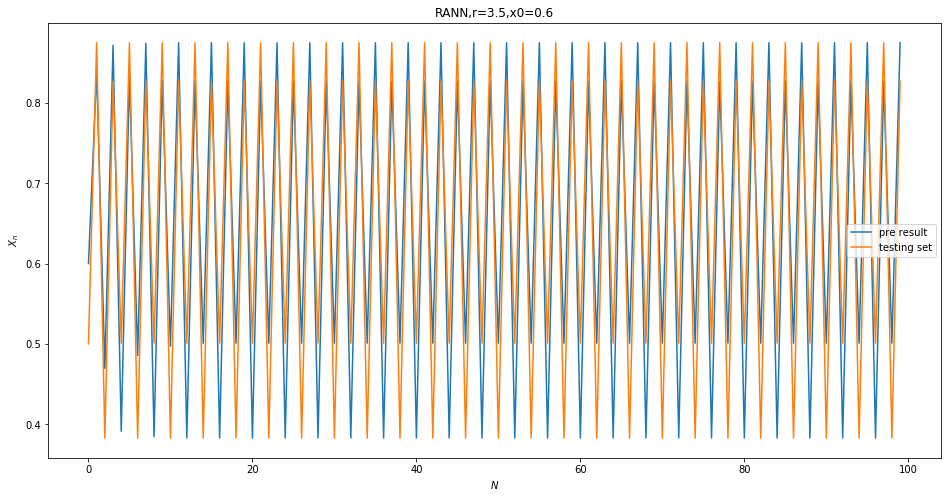

In [75]:
XR1,YR1=Logisticmapdynamics(0.5,3.5,100)

plt.figure(figsize=(16,8))
plt.xlabel("$N$")
plt.ylabel("$X_{n}$")
plt.title("RANN,r=3.5,x0=0.6")
plt.plot(RN1_2,RXOUT1_2,label='pre result')
plt.plot(XR1,YR1,label='testing set')
plt.legend(loc=0)

#### 初值不同(偏差较大)

In [23]:
xr1_3=0.2
steps=100
romega1_1=ROmega1_1
romega2_1=ROmega2_1
RN1_3,RXOUT1_3=RANNTS(xr1_3,steps,romega1_1,romega2_1)

##### 输出预测结果

我们进一步增大初值的差值至0.3，使模型的初值为0.2。此时可以看出，在拟合行为上，即随着迭代的进行，模型始终无法追上原函数。模型与原函数之间仿佛存在相位差。

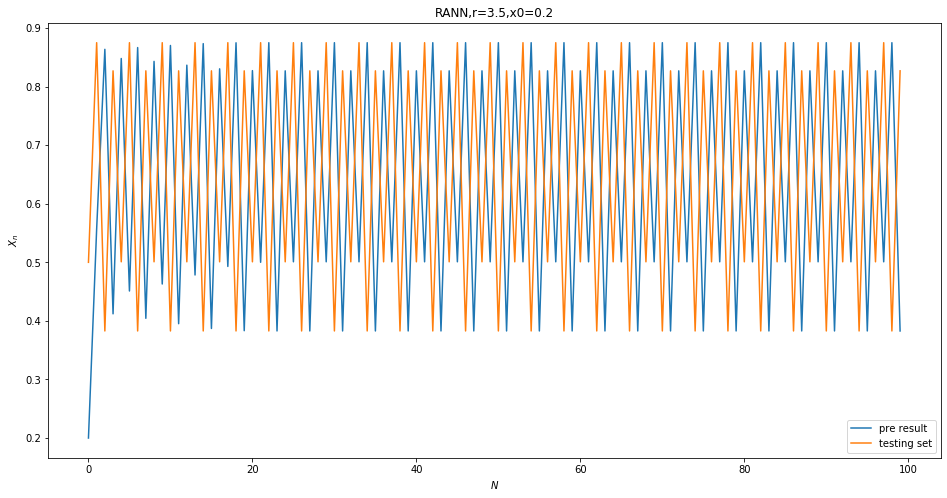

In [76]:
XR1,YR1=Logisticmapdynamics(0.5,3.5,100)

plt.figure(figsize=(16,8))
plt.xlabel("$N$")
plt.ylabel("$X_{n}$")
plt.title("RANN,r=3.5,x0=0.2")
plt.plot(RN1_3,RXOUT1_3,label='pre result')
plt.plot(XR1,YR1,label='testing set')
plt.legend(loc=0)

## 简单结论

通过对r=3.5的logistic时间序列拟合，我们可以看出，在初值相同的情况下，随机网络相对常规网络有着明显的优势，不仅训练时间更短，拟合精度也更高，然而随着初值的改变，二者都不能很好的拟合原函数。随着初值增大，常规模型的“幅度”无法与原函数相拟合，随机模型的“相位”无法与原函数相拟合。可见logistic时间序列具有较强的初值敏感性，且对常规模型与随机模型存在不同的影响。此外，在训练的过程中发现，常规网络的宽度不能取的太宽，当取与随机网络一样1000层时，常规网络不仅效率低下（训练时间极长），且精度反而显著下降。但常规网络可以用较小的层宽拟合出较好的结果，随机网络则需要较大的宽度，因此二者各有优劣。

# 探索预测能力与李指数的关系

logistic map的奇妙之处在于随着r值的变化，其混沌性（即李雅普诺夫指数）不停改变。上述过程中我们采用系统稳定（即李雅普诺夫指数小于0）的r值进行探索，接下来我们分别对临界状态（李雅普诺夫指数等于0）与混沌状态（李雅普诺夫指数大于0）的状态进行探索。

## 用李雅普诺夫指数为0的r值进行预测(r=1.0)

首先我们对李氏指数为0的情况进行探索，由文章开头的图中，我们取r=1.0，此时系统稳定，李氏指数为0。

### 生成训练集

我们依旧取初值为0.5进行迭代，获取100个数据点作为训练集。

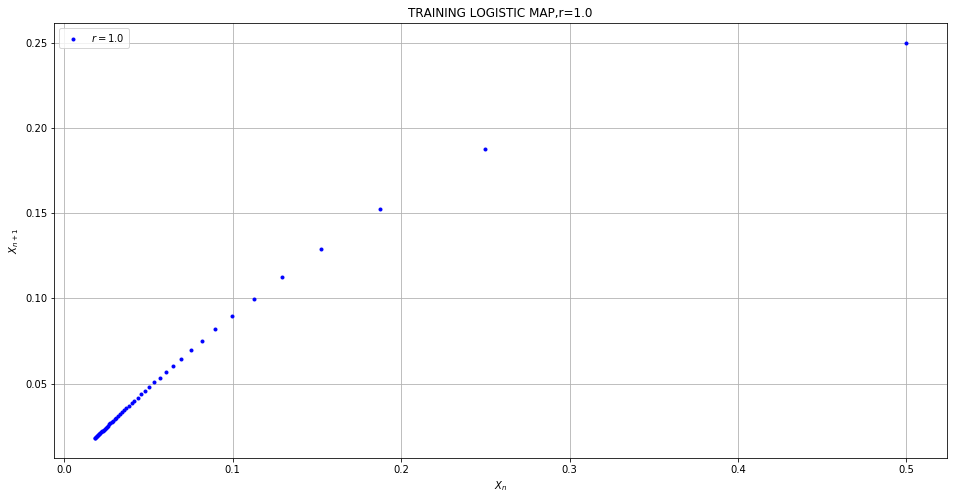

In [26]:
xt1,r1,m1=0.5,1.0,50
XTR1,YTR1=logitime(xt1,r1,m1)
XTR1=XTR1.reshape(-1,1)
YTR1=YTR1.reshape(-1,1)
plt.figure(figsize=(16, 8))
plt.xlabel("$X_{n}$")
plt.ylabel("$X_{n+1}$")
plt.title("TRAINING LOGISTIC MAP,r=1.0")
plt.plot(XTR1,YTR1,'b.',label='$r=1.0$')
plt.legend(loc=0)
plt.grid(True)

### 用常规网络预测

首先用常规网络进行探索。

#### 进行训练

In [27]:
#ANN(input_object,target,n_iter,alpha,hidden_layer_dimension)
#ANN(坐标变量、y值，训练次数，学习率，隐藏层宽度)
Jx_2,J_2,a_out_2,Omega1_2,Omega2_2=ANN(XTR1,YTR1,100000,0.11,10)

##### 输出训练结果

由训练结果可见，当r取1时，在相同超参数下，训练精度极大提高。

由下图可见

The Last Cost Function is 4.1328435318678695e-05
Wall time: 26.4 ms


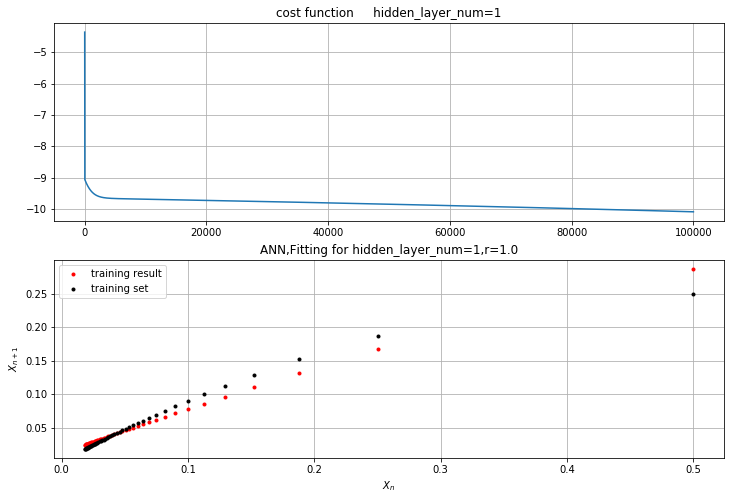

In [91]:
%%time
plt.figure(figsize=(12,8))
print('The Last Cost Function is',J_2[-1])
plt.subplot(211)
plt.plot(Jx_2,np.log(J_2))
plt.title("cost function"+"     "+"hidden_layer_num=1")
plt.grid(True)

plt.subplot(212)
plt.title("ANN,Fitting for hidden_layer_num=1,r=1.0")
plt.xlabel("$X_{n}$")
plt.ylabel("$X_{n+1}$")
plt.plot(XTR1,a_out_2,'r.',label='training result')
plt.plot(XTR1,YTR1,'k.',label='training set')
plt.legend(loc=0)
plt.grid(True)

#### 进行预测

##### 初值相同

In [31]:
xa2_1=0.5
steps=100
omega1_2=Omega1_2
omega2_2=Omega2_2
N2_1,XOUT2_1=ANNTS(xa2_1,steps,omega1_2,omega2_2)

###### 输出预测结果

相同初值的情况下，可见模型与原函数在刚开始迭代时模型拟合上了原函数的轨迹，随着次数增大，可以看到，拟合的并不是很好。

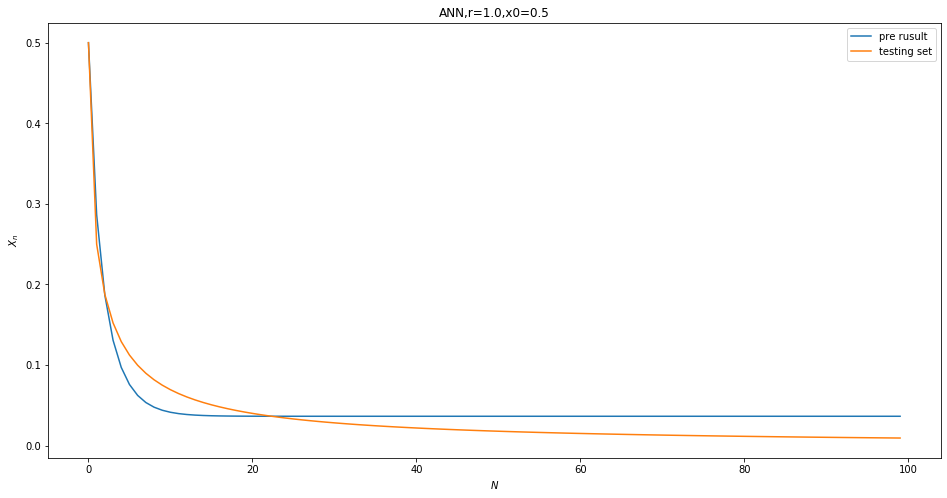

In [77]:
AX2,AY2=Logisticmapdynamics(0.5,1.0,100)

plt.figure(figsize=(16,8))
plt.xlabel("$N$")
plt.ylabel("$X_{n}$")
plt.title("ANN,r=1.0,x0=0.5")
plt.plot(N2_1,XOUT2_1,label='pre rusult')
plt.plot(AX2,AY2,label='testing set')
plt.legend(loc=0)

##### 初值不同(偏差较小)

In [33]:
xa2_2=0.6
steps=100
omega1_2=Omega1_2
omega2_2=Omega2_2
N2_2,XOUT2_2=ANNTS(xa2_2,steps,omega1_2,omega2_2)

###### 输出预测结果

接下来我们让初值改变量为0.1，使模型的初值为0.6，可见在经历一段时间的迭代后，模型也与原函数走向了不同的方向。

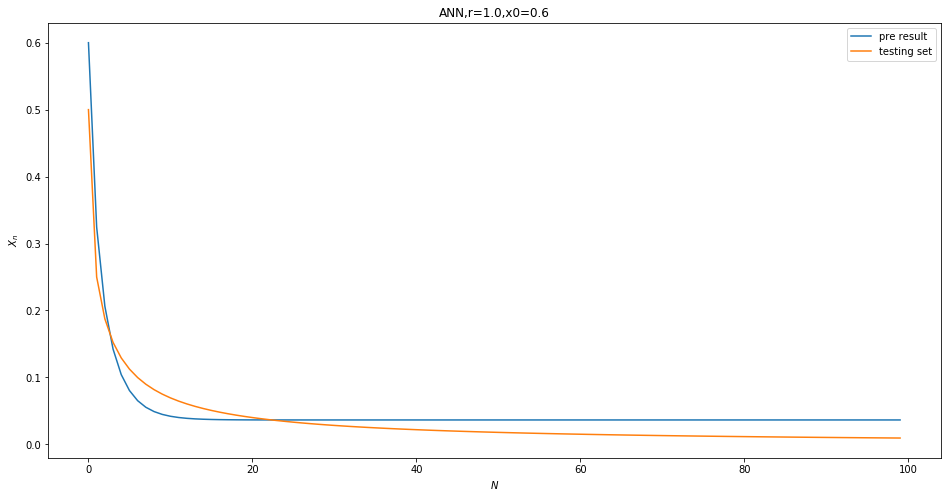

In [78]:
AX2,AY2=Logisticmapdynamics(0.5,1.0,100)

plt.figure(figsize=(16,8))
plt.xlabel("$N$")
plt.ylabel("$X_{n}$")
plt.title("ANN,r=1.0,x0=0.6")
plt.plot(N2_2,XOUT2_2,label='pre result')
plt.plot(AX2,AY2,label='testing set')
plt.legend(loc=0)

##### 初值不同(偏差较大)

In [37]:
xa2_3=0.2
steps=100
omega1_2=Omega1_2
omega2_2=Omega2_2
N2_3,XOUT2_3=ANNTS(xa2_3,steps,omega1_2,omega2_2)

###### 输出预测结果

接下来我们把初值改变量增加到0.3，使模型初值为0.2，可见在经历一段时间的迭代后，模型始终无法拟合上原函数的时间序列。

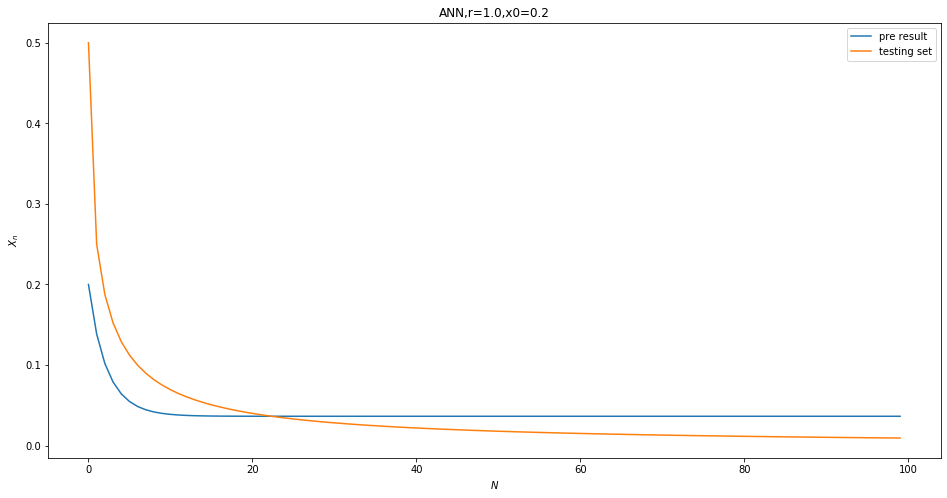

In [79]:
AX2,AY2=Logisticmapdynamics(0.5,1.0,100)

plt.figure(figsize=(16,8))
plt.xlabel("$N$")
plt.ylabel("$X_{n}$")
plt.title("ANN,r=1.0,x0=0.2")
plt.plot(N2_3,XOUT2_3,label='pre result')
plt.plot(AX2,AY2,label='testing set')
plt.legend(loc=0)

### 用随机网络预测

接下来我们采用随机网络进行探索。

#### 进行训练

In [40]:
%%time
ra_out_2,error_2,ra_feature_2,ROmega1_2,ROmega2_2=RANN(XTR1,YTR1,1000)

Wall time: 185 ms


##### 输出训练结果

由下图及RMSE的值可见，训练效果依旧很完美。


TRaining RMSE: 4.705716319806586e-08


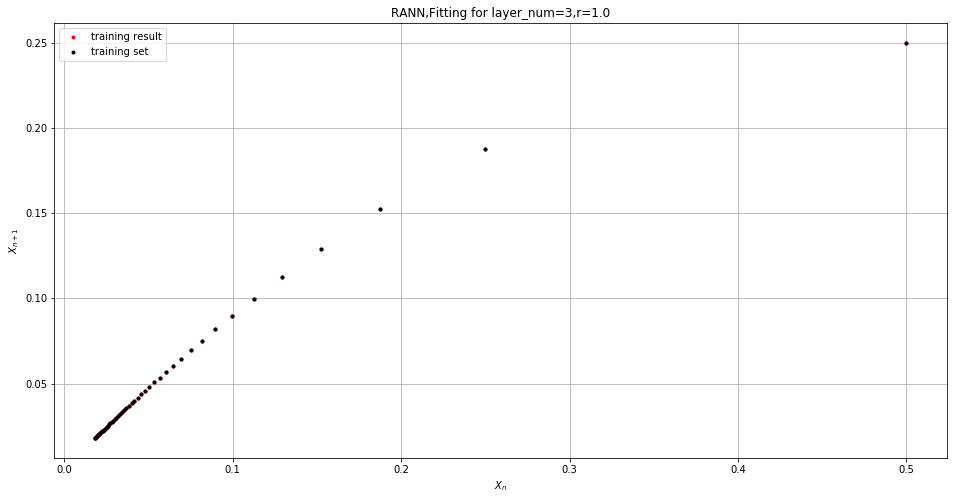

In [92]:
plt.figure(figsize=(16,8))
plt.xlabel("$X_{n}$")
plt.ylabel("$X_{n+1}$")
plt.title("RANN,Fitting for layer_num=3,r=1.0")
print("TRaining RMSE:",error_2)
plt.plot(XTR1,ra_out_2,'r.',label='training result')
plt.plot(XTR1,YTR1,'k.',label='training set')
plt.legend(loc=0)
plt.grid(True)

#### 进行预测

##### 初值相同

In [42]:
xr2_1=0.5
steps=100
romega1_2=ROmega1_2
romega2_2=ROmega2_2
RN2_1,RXOUT2_1=RANNTS(xr2_1,steps,romega1_2,romega2_2)

###### 输出预测结果

在初值相同的情况下，模型很好的拟合了原函数。

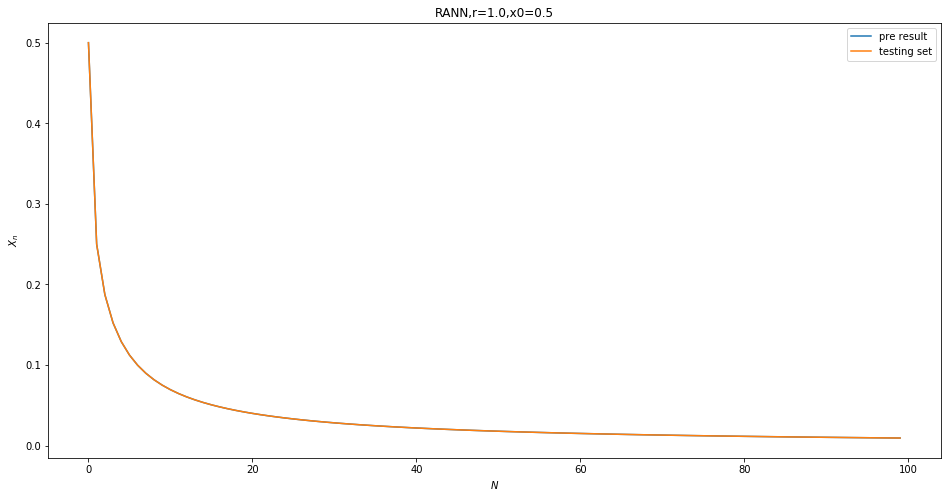

In [80]:
XR2,YR2=Logisticmapdynamics(0.5,1.0,100)

plt.figure(figsize=(16,8))
plt.xlabel("$N$")
plt.ylabel("$X_{n}$")
plt.title("RANN,r=1.0,x0=0.5")
plt.plot(RN2_1,RXOUT2_1,label='pre result')
plt.plot(XR2,YR2,label='testing set')
plt.legend(loc=0)

##### 初值不同(偏差较小)

In [45]:
xr2_2=0.6
steps=100
romega1_2=ROmega1_2
romega2_2=ROmega2_2
RN2_2,RXOUT2_2=RANNTS(xr2_2,steps,romega1_2,romega2_2)

###### 输出预测结果

令模型的初值为0.6，可见在初值改变较小的情况下，模型依旧很好的拟合了原函数。

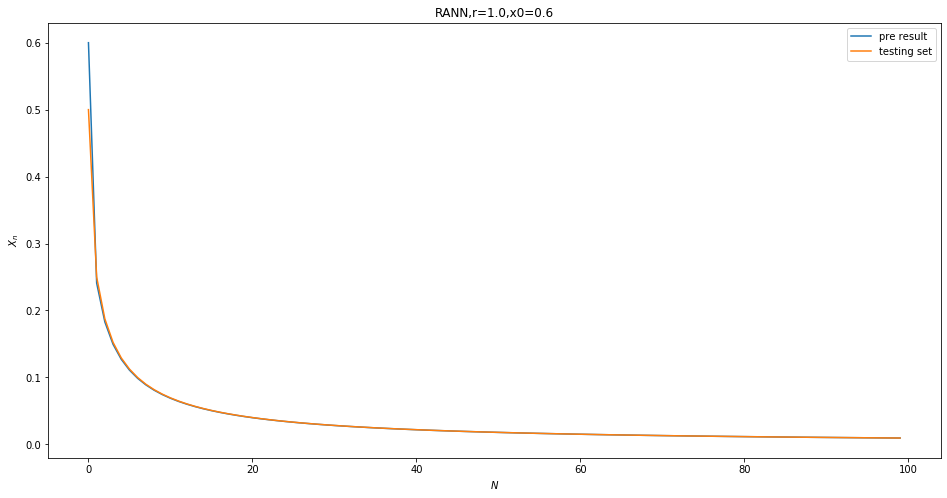

In [81]:
XR2,YR2=Logisticmapdynamics(0.5,1.0,100)

plt.figure(figsize=(16,8))
plt.xlabel("$N$")
plt.ylabel("$X_{n}$")
plt.title("RANN,r=1.0,x0=0.6")
plt.plot(RN2_2,RXOUT2_2,label='pre result')
plt.plot(XR2,YR2,label='testing set')
plt.legend(loc=0)

##### 初值不同(偏差较大)

In [47]:
xr2_3=0.2
steps=100
romega1_2=ROmega1_2
romega2_2=ROmega2_2
RN2_3,RXOUT2_3=RANNTS(xr2_3,steps,romega1_2,romega2_2)

###### 输出预测结果

令模型的初值为0.2，可见初值的差值增大后，在开始迭代时二者有一定偏差，但随着时间推进，模型很快拟合上了原函数。

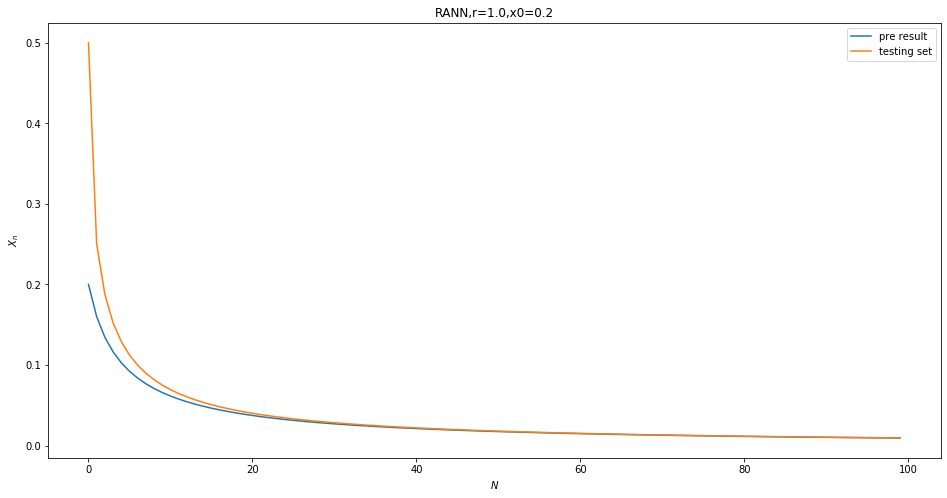

In [82]:
XR2,YR2=Logisticmapdynamics(0.5,1.0,100)

plt.figure(figsize=(16,8))
plt.xlabel("$N$")
plt.ylabel("$X_{n}$")
plt.title("RANN,r=1.0,x0=0.2")
plt.plot(RN2_3,RXOUT2_3,label='pre result')
plt.plot(XR2,YR2,label='testing set')
plt.legend(loc=0)

## 用李亚普诺指数>0的r值进行预测(r=3.9)

接下来令r=3.9，此时的系统是出于混沌状态的。

### 生成训练集

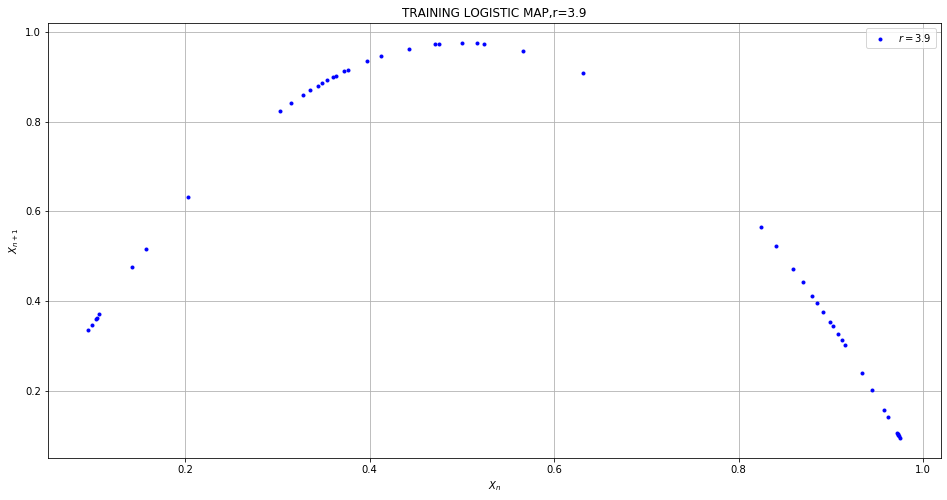

In [49]:
xt2,r2,m2=0.5,3.9,50
XTR2,YTR2=logitime(xt2,r2,m2)
XTR2=XTR2.reshape(-1,1)
YTR2=YTR2.reshape(-1,1)
plt.figure(figsize=(16, 8))
plt.xlabel("$X_{n}$")
plt.ylabel("$X_{n+1}$")
plt.title("TRAINING LOGISTIC MAP,r=3.9")
plt.plot(XTR2,YTR2,'b.',label='$r=3.9$')
plt.legend(loc=0)
plt.grid(True)

### 用常规网络预测

首先用常规网络进行训练，可见训练结果十分优异。

#### 进行训练

In [50]:
#ANN(input_object,target,n_iter,alpha,hidden_layer_dimension)
#ANN(坐标变量、y值，训练次数，学习率，隐藏层宽度)
Jx_3,J_3,a_out_3,Omega1_3,Omega2_3=ANN(XTR2,YTR2,100000,0.11,10)

##### 输出训练结果

The Last Cost Function is 6.064714138418035e-05
Wall time: 26 ms


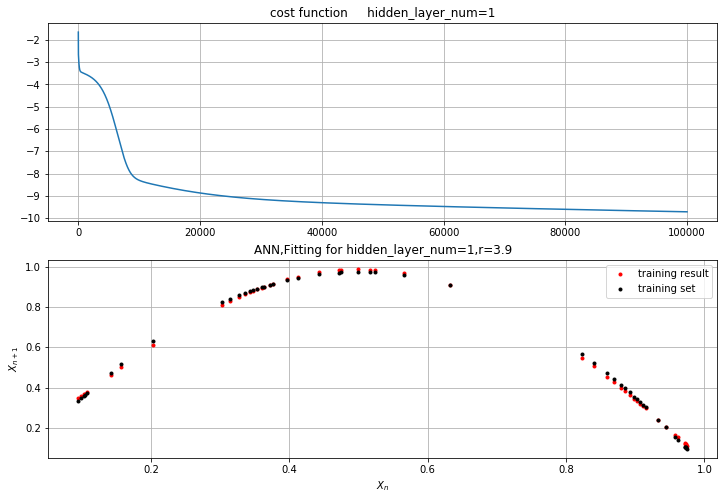

In [93]:
%%time
plt.figure(figsize=(12,8))
print('The Last Cost Function is',J_3[-1])
plt.subplot(211)
plt.plot(Jx_3,np.log(J_3))
plt.title("cost function"+"     "+"hidden_layer_num=1")
plt.grid(True)

plt.subplot(212)
plt.title("ANN,Fitting for hidden_layer_num=1,r=3.9")
plt.xlabel("$X_{n}$")
plt.ylabel("$X_{n+1}$")
plt.plot(XTR2,a_out_3,'r.',label='training result')
plt.plot(XTR2,YTR2,'k.',label='training set')
plt.legend(loc=0)
plt.grid(True)

#### 进行预测

##### 初值相同

In [53]:
xa3_1=0.5
steps=100
omega1_3=Omega1_3
omega2_3=Omega2_3
N3_1,XOUT3_1=ANNTS(xa3_1,steps,omega1_3,omega2_3)

###### 输出预测结果

首先不改变初值，我们可见，开始极短时间内，模型拟合上了原函数，但很快模型失去了拟合效果，变得混乱。

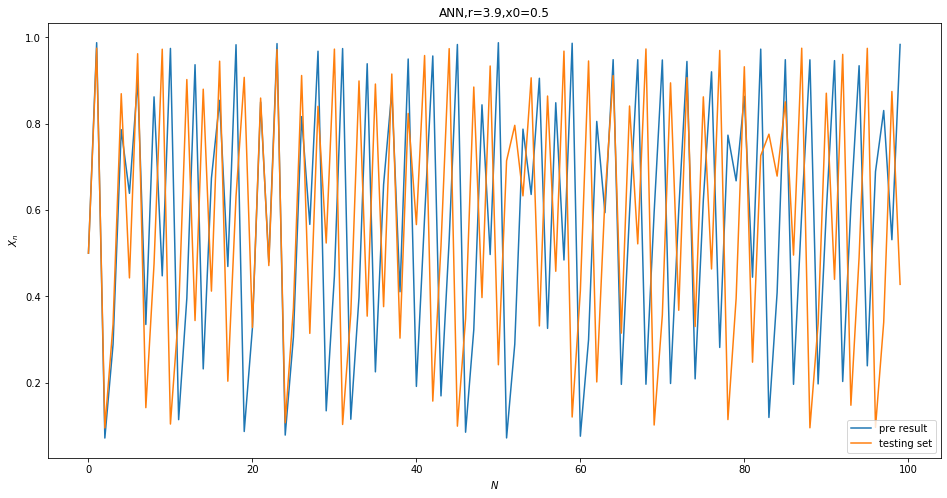

In [83]:
AX3,AY3=Logisticmapdynamics(0.5,3.9,100)

plt.figure(figsize=(16,8))
plt.xlabel("$N$")
plt.ylabel("$X_{n}$")
plt.title("ANN,r=3.9,x0=0.5")
plt.plot(N3_1,XOUT3_1,label='pre result')
plt.plot(AX3,AY3,label='testing set')
plt.legend(loc=0)

##### 初值不同(偏差较小)

In [55]:
xa3_2=0.6
steps=100
omega1_3=Omega1_3
omega2_3=Omega2_3
N3_2,XOUT3_2=ANNTS(xa3_2,steps,omega1_3,omega2_3)

###### 输出预测结果

令初值改变量为0.1，使模型的初值为0.6，此时可见，在开始极短时间内，模型追上了原函数并成功拟合，但马上失去作用陷入混乱。

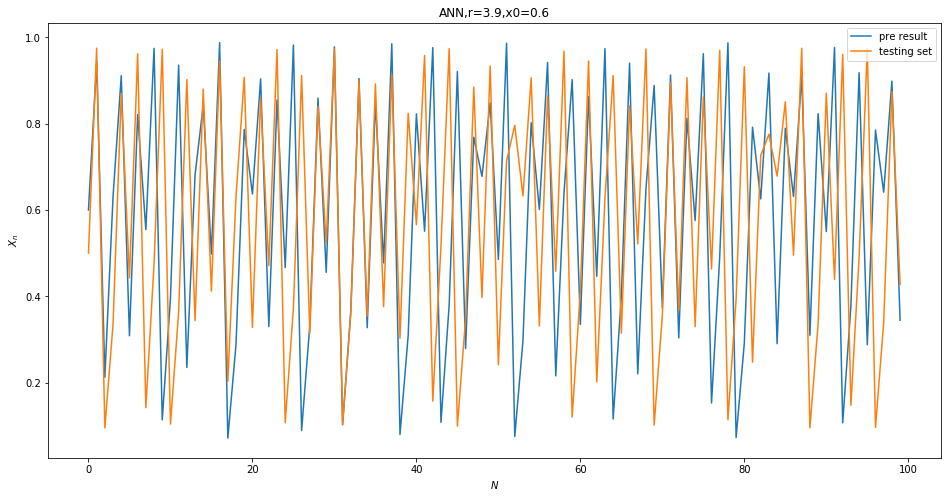

In [84]:
AX3,AY3=Logisticmapdynamics(0.5,3.9,100)

plt.figure(figsize=(16,8))
plt.xlabel("$N$")
plt.ylabel("$X_{n}$")
plt.title("ANN,r=3.9,x0=0.6")
plt.plot(N3_2,XOUT3_2,label='pre result')
plt.plot(AX3,AY3,label='testing set')
plt.legend(loc=0)

##### 初值不同(偏差较大)

In [57]:
xa3_3=0.2
steps=100
omega1_3=Omega1_3
omega2_3=Omega2_3
N3_3,XOUT3_3=ANNTS(xa3_3,steps,omega1_3,omega2_3)

###### 输出预测结果

进一步增大初值改变量至0.3，使模型的初值为0.2，由下图可见模型没有拟合上原函数，推广能力几乎为0.

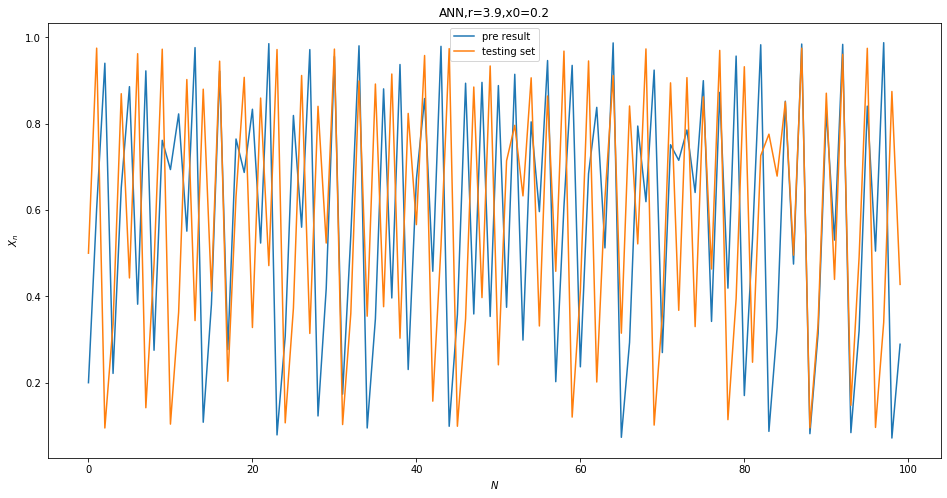

In [85]:
AX3,AY3=Logisticmapdynamics(0.5,3.9,100)

plt.figure(figsize=(16,8))
plt.xlabel("$N$")
plt.ylabel("$X_{n}$")
plt.title("ANN,r=3.9,x0=0.2")
plt.plot(N3_3,XOUT3_3,label='pre result')
plt.plot(AX3,AY3,label='testing set')
plt.legend(loc=0)

### 用随机网络预测

下面用随机网络来探索该系统。

#### 进行训练

In [60]:
%%time
ra_out_3,error_3,ra_feature_3,ROmega1_3,ROmega2_3=RANN(XTR2,YTR2,1000)

Wall time: 174 ms


##### 输出训练结果

可见训练结果十分优秀。

TRaining RMSE: 4.705716319806586e-08


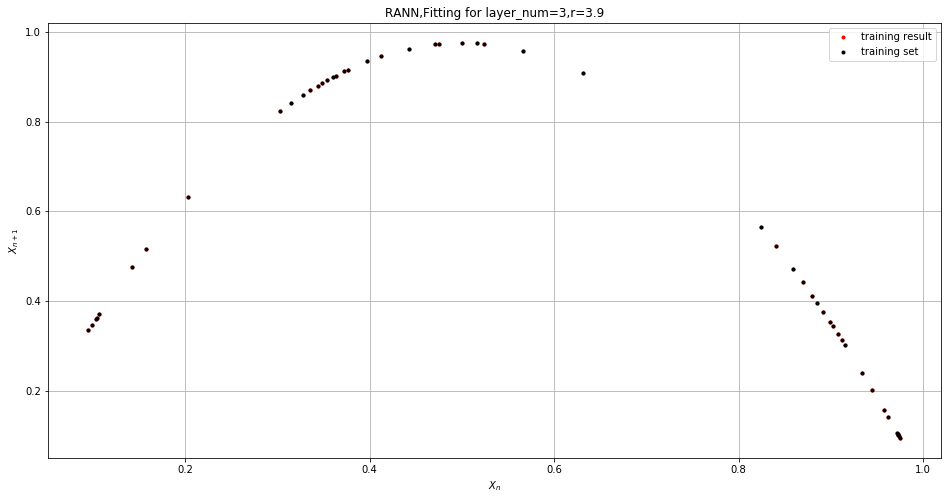

In [94]:
plt.figure(figsize=(16,8))
plt.xlabel("$X_{n}$")
plt.ylabel("$X_{n+1}$")
plt.title("RANN,Fitting for layer_num=3,r=3.9")
print("TRaining RMSE:",error_2)
plt.plot(XTR2,ra_out_3,'r.',label='training result')
plt.plot(XTR2,YTR2,'k.',label='training set')
plt.legend(loc=0)
plt.grid(True)

#### 进行预测

##### 初值相同

In [63]:
xr3_1=0.5
steps=100
romega1_3=ROmega1_3
romega2_3=ROmega2_3
RN3_1,RXOUT3_1=RANNTS(xr3_1,steps,romega1_3,romega2_3)

###### 输出预测结果

初值相同时，可见在开始迭代的一段时间内，模型很好的拟合了原函数，但随着时间的推移，拟合情况慢慢变得糟糕，直至混乱。

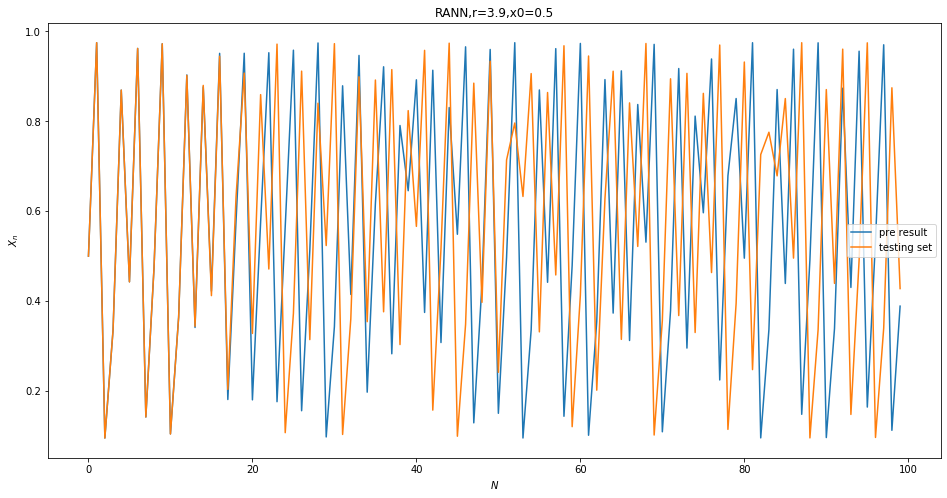

In [86]:
XR3,YR3=Logisticmapdynamics(0.5,3.9,100)

plt.figure(figsize=(16,8))
plt.xlabel("$N$")
plt.ylabel("$X_{n}$")
plt.title("RANN,r=3.9,x0=0.5")
plt.plot(RN3_1,RXOUT3_1,label='pre result')
plt.plot(XR3,YR3,label='testing set')
plt.legend(loc=0)

##### 初值不同(偏差较小)

In [67]:
xr3_2=0.6
steps=100
romega1_3=ROmega1_3
romega2_3=ROmega2_3
RN3_2,RXOUT3_2=RANNTS(xr3_2,steps,romega1_3,romega2_3)

###### 输出预测结果

令初值改变量为0.1，使模型的初值为0.6。可见模型几乎无法拟合原函数。此时模型几乎丧失了推广能力。

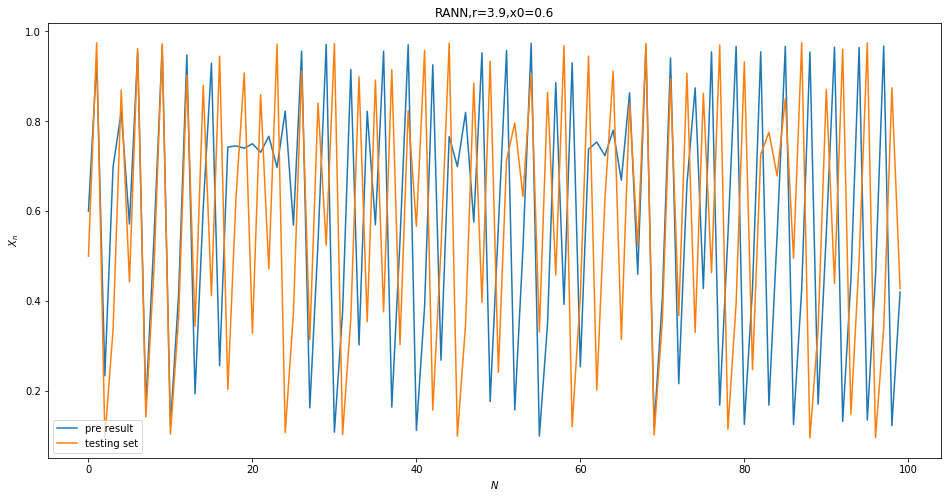

In [87]:
XR3,YR3=Logisticmapdynamics(0.5,3.9,100)

plt.figure(figsize=(16,8))
plt.xlabel("$N$")
plt.ylabel("$X_{n}$")
plt.title("RANN,r=3.9,x0=0.6")
plt.plot(RN3_2,RXOUT3_2,label='pre result')
plt.plot(XR3,YR3,label='testing set')
plt.legend(loc=0)

##### 初值不同(偏差较大)

In [69]:
xr3_3=0.2
steps=100
romega1_3=ROmega1_3
romega2_3=ROmega2_3
RN3_3,RXOUT3_3=RANNTS(xr3_3,steps,romega1_3,romega2_3)

###### 输出预测结果

进一步增大初值改变量至0.3，使模型的初值为0.2，可见模型走入自己的轨道，从一开始就与原函数分道扬镳，陷入混乱。

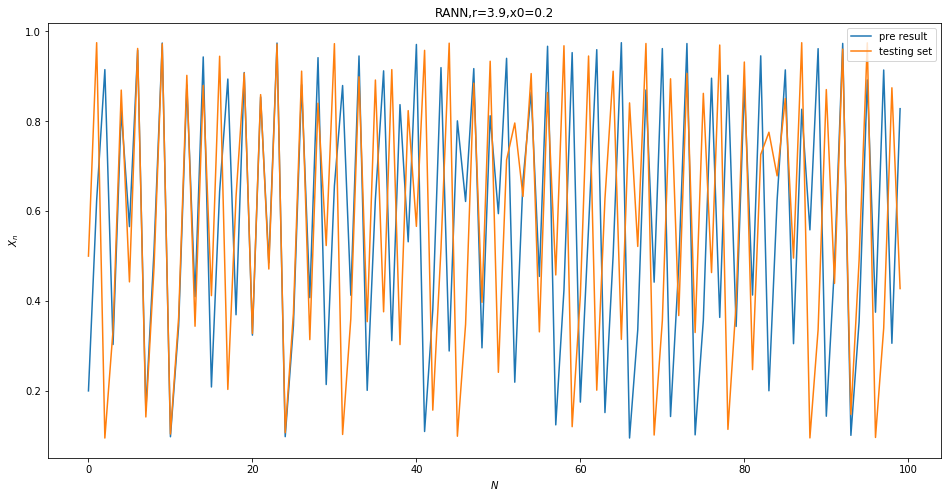

In [88]:
XR3,YR3=Logisticmapdynamics(0.5,3.9,100)

plt.figure(figsize=(16,8))
plt.xlabel("$N$")
plt.ylabel("$X_{n}$")
plt.title("RANN,r=3.9,x0=0.2")
plt.plot(RN3_3,RXOUT3_3,label='pre result')
plt.plot(XR3,YR3,label='testing set')
plt.legend(loc=0)

# 讨论

## 一般性结论

首先根据文中的各种情况列出表格

从表格及上文结果中我们可以看到

- 在训练情况上，随着李指数增大，常规网络的训练精度显著提升，而随机网络一直保持极高的训练精度。



- 在预测时间序列时，我们可以看到，无论是常规网络还是随机网络，随着李指数增大，时间序列都变得越来越难以预测。可以很好的体现出系统的有序/混沌性质。

  而在相同李指数的情况下，随机三层网络相对常规三层网络有着较好的优势，即改变初值的情况下，随机网络都能很快找到正确迭代路线。并且这种差异随着李指数的增大而愈发明显。即使是在李指数大于0的混沌情况下，随机网络成功拟合的时间也是明显长于常规网络的，这一点可以从文中的图以及下表看出。

**表格：**

|李指数| 条件  | 常规网络     | 随机网络 |
|:---------------:|:---------------:|:--------------:|:--------------:|
|L小于0    |      |   |    |
|    |训练情况| lost fuction精度达到0.001    | RMSE达到10的负8次方量级 |
|   |初值不变| 走势上拟合，幅度上有区别   | 很好的拟合 |
|    |初值微变|  一段时间后走势拟合，幅度上有区别 |走势很好拟合，幅度上有区别  |
|   |较大改变初值| 一段时间后走势拟合，幅度上有区别  | 无法拟合，走势上有“相位差' |
|L等于0  |   |   |   |
|    |训练情况|  lost function精度达到10的负5次方量级  | RMSE达到10的负8次方量级 |
|   |初值不变| 拟合一段时间后出现偏差   |很好的拟合  |
|    |初值微变| 走势接近，未完全拟合  |极短时间内很快拟合   |
|   |较大改变初值| 未拟合  | 极短时间内很快拟合  |
|L大于0  |   |  |    |
|    |训练情况| lost function精度达到10的负5次方量级    | RMSE达到10的负8次方量级  |
|   |初值不变| 开始一小段拟合后，很快变得混乱   | 拟合一段时间后开始混乱  |
|    |初值微变| 极短时间内拟合，随后变得混乱  | 极短时间内拟合，随后变得混乱  |
|   |较大改变初值| 未拟合  | 未拟合  |









## 总结

从本文的简单实验中我们可以看见，利用机器学习算法预测未来是困难的，尤其随着系统复杂度的增加，未来走势愈发难以预测。本文采用的是一个简单的三层网络，如果想更好拟合文中所用的logistic map或许可以通过增加网络深度及宽度的方法来进行。然而我们不得不承认，这还是一个理想系统，当遇到复杂的真实系统，如股票的走势时，我们的算法将无能为力，再深再宽的算法只是徒增无用计算时间。因此，如果想要拟合一个复杂系统，我们或许可以采用更高级的算法，如当下火热的深度学习等，此外还应该全面考虑现实世界的干扰。

在我看来，在当下使用人工智能预测未来是不全面的，因为人类创造人工智能本身是对人类智慧的一种数学模拟。然而我们走入现代社会不过百余年，对于思想的认知还处于初步阶段。我相信当下的一些瓶颈随着人类哲学的发展会得到很好的解决，但是创造出一种完美的可预测未来的算法是不可能的，这本身是一种哲学上的矛盾，我们不可能创造出一个“神”。因此我认为人工智能的本质是人类生产力的辅助者而非人类的代替者，我们应该做的是大力发展哲学发展科学，而非在当下担忧“人工智能叛乱”，这种忧虑更多的是来源于我们的无知。

# 写在最后

尽管之前有略微了解机器学习的概念，但通过这门课程，才真正对机器学习是什么有了浅显的体会，从“训练集”到“测试集”一步一步体会何为“AI”。通过严谨的数学表达，揭下了“人工智能”的神秘面纱。Alpha Go不再神秘，“人工智能”也不再是网络上标题党的名词，通过课程的学习，让我们有机会用自己的双手敲出“奇迹”。此外，身为物理系的学生，通过课程可以将现实中的物理过程与新时代的技术相结合，让物理不再古板枯燥，使物理图像可以通过代码生动展示。

本文在阿里云ECS上完成，感谢阿里云在疫情期间免费提供的学生服务器。

最后，一学期的机器学习课结束了，尽管网络授课有诸多不便，但老师依旧尽心尽力教授了本学期的课程，在此感谢老师的用心付出！

# 参考文献

[1]维基百科词条【logistic map】

[2]百度百科词条【时间序列】

[3]张勇,科学编程入门,李雅普诺夫指数

[4]维基百科词条【人工神经网络】